In [437]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Создадим обучающую выборку размером 20.

In [146]:
data_size = 20
uldata = 10 * np.random.ranf((data_size,)) #обучающая выборка из равномерного распределения на отрезке [0, 10]
e1 = 0.1 * np.random.randn(data_size, ) #ошибки равномерно распределенные с σ = 0.1
y_data = np.sin(uldata) + e1 #Применяем полиномиальное преобразование

Аналогично создает тестовую выборку, но размером 1000.

In [147]:
test_size = 1000
ultest = 10 * np.random.ranf((test_size,))
e2 = 0.1 * np.random.randn(test_size, )
y_test = np.sin(ultest) + e2

Генерируем матрицу признаков объектов для тестовой и обучающей выборки.

In [196]:
uldata_features, ultest_features = [], []
for d in xrange(data_size):
    uldata_features.append([uldata ** i for i in xrange(d+1)])
    ultest_features.append([ultest ** i for i in xrange(d+1)])

Ищем набор коэффициентов, который получается на каждой из матриц признаков объектов.

In [509]:
alpha = [(np.matrix(uldata_features[i]) * np.matrix(uldata_features[i]).getT()).getI() * np.matrix(uldata_features[i]) * 
             np.matrix(y_data).getT() for i in xrange(20)]

In [390]:
def regression_plot(real_func, approximated_func, x, y, degree=None):
    x_func = np.arange(0, 10, 0.01)
    plt.figure(figsize=(7, 3))
    if degree is not None: plt.title("degree = {}".format(degree))
    plt.plot(x_func, real_func(x_func))
    plt.plot(x_func, approximated_func(x_func))
    plt.plot(x, y, 'ro')
    plt.legend(['real function', 'approximated function'])  
    return plt

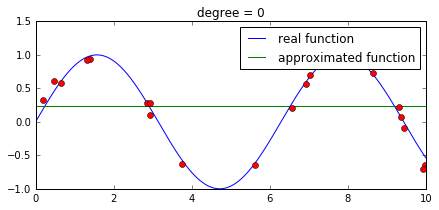

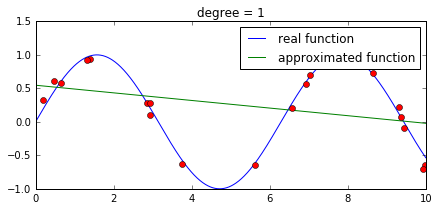

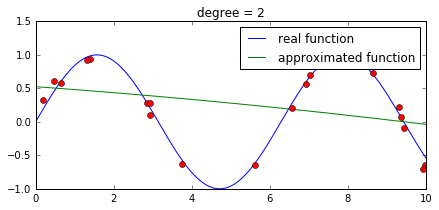

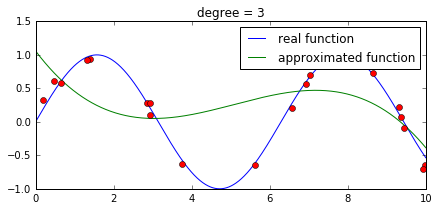

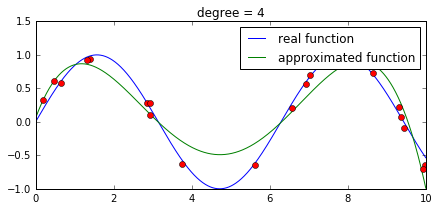

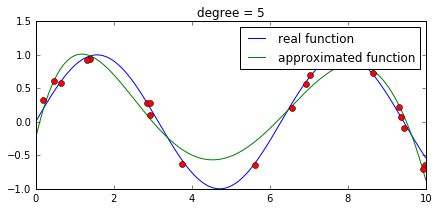

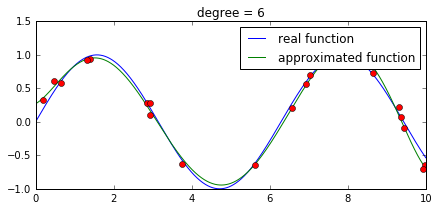

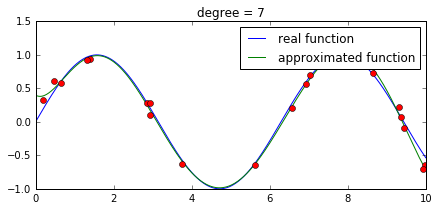

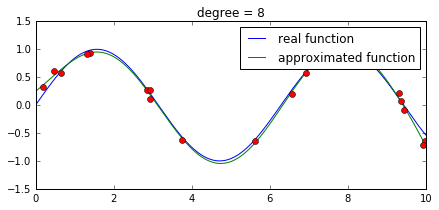

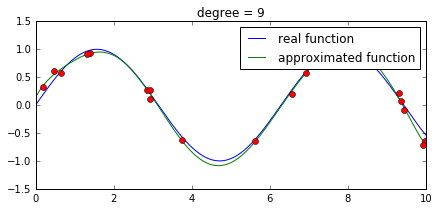

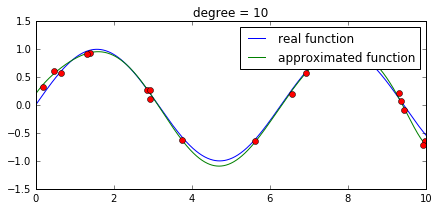

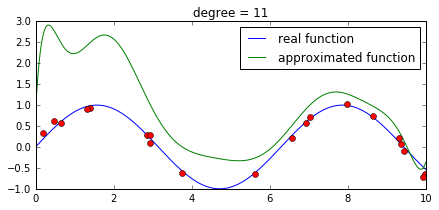

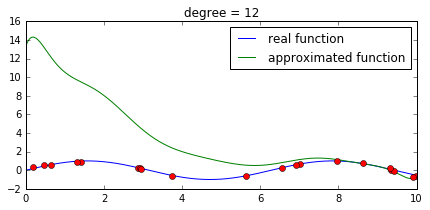

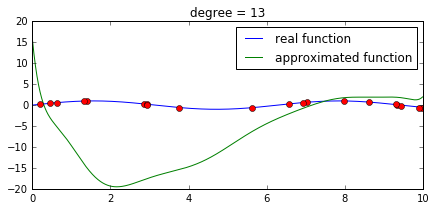

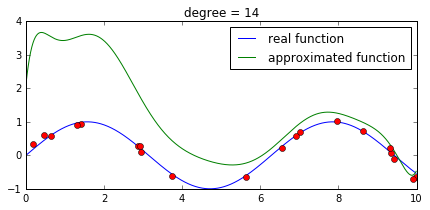

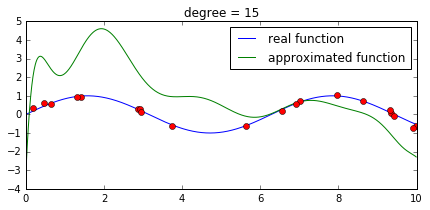

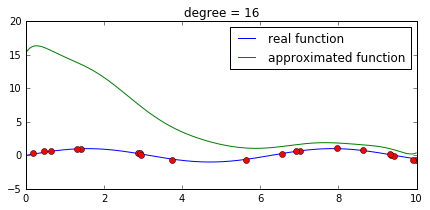

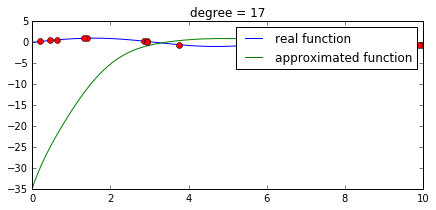

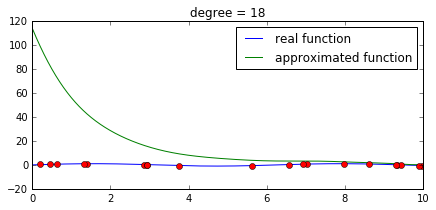

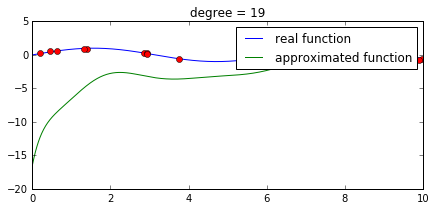

In [397]:
for i in xrange(20):
    plt = regression_plot(np.sin, lambda x: np.polynomial.polynomial.Polynomial(np.array(alpha[i]).ravel())(x), uldata, y_data, i)
    plt.show()

Функция для отражения зависимости MSE от d и логарифма детерминанта от d

In [471]:
def dependency_plot(x, y, xlabel="", ylabel=""):
    plt.figure(figsize=(15, 7))
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.plot(x, y)
    return plt

Вычислим MSE

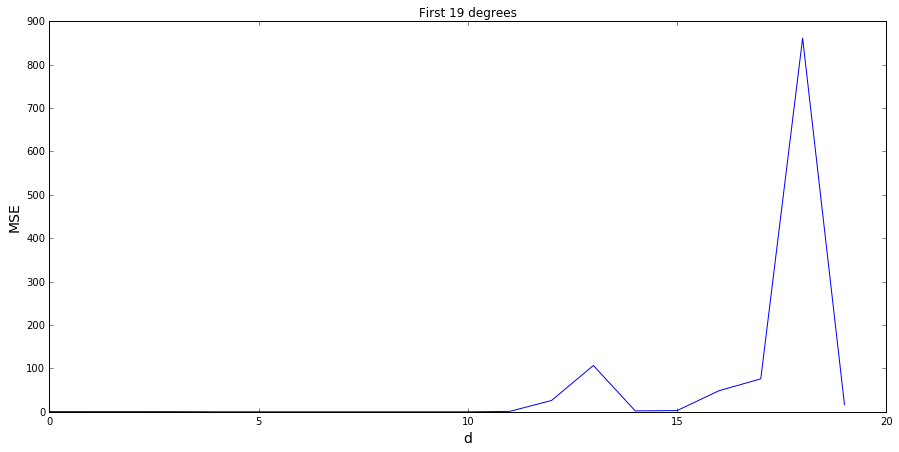

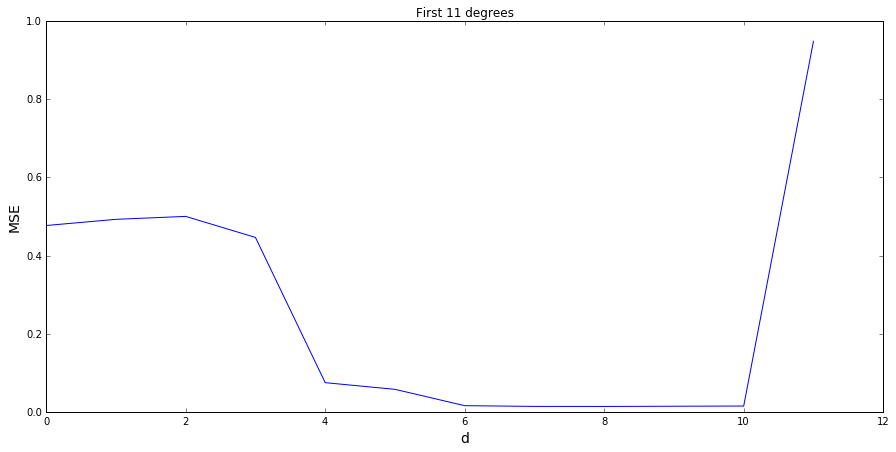

In [520]:
MSE = [((np.polynomial.polynomial.Polynomial(np.array(alpha[i]).ravel())(ultest) - y_test)**2).mean() for i in xrange(20)]
dependency_plot(range(20), MSE, 'd', 'MSE').title('First 19 degrees', fontsize=12)
dependency_plot(range(12), MSE[:12], 'd', 'MSE').title('First 11 degrees', fontsize=12)

График зависимости величины log det от d

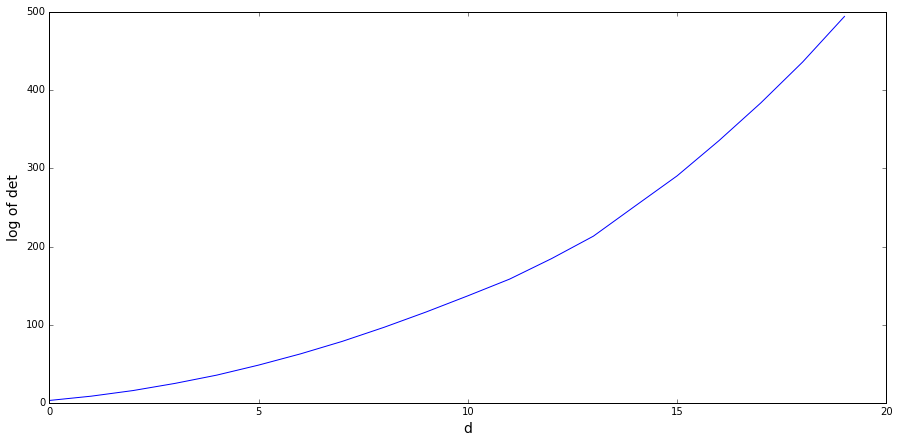

In [477]:
log_det = [np.log(abs(np.linalg.det(np.matrix(uldata_features[i]) * np.matrix(uldata_features[i]).getT()))) for i in xrange(20)]
dependency_plot(range(20), log_det, 'd', 'log of det').show()

Выберем d = 8 и применим L2 регуляризацию. Возьмем 6 лямбд. (-2.3, 3, 3.17, 4.09, 4.38, 4.60)

In [522]:
alpha = [(np.matrix(uldata_features[d]) * np.matrix(uldata_features[d]).getT() + np.log(i) * np.eye(d+1)).getI() * 
         np.matrix(uldata_features[d]) * np.matrix(y_data).getT() for i in np.arange(0.1, 100.2, 20)]

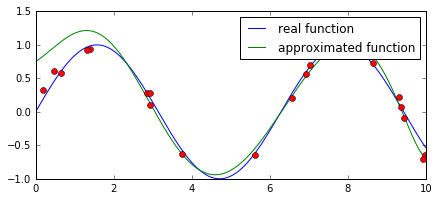

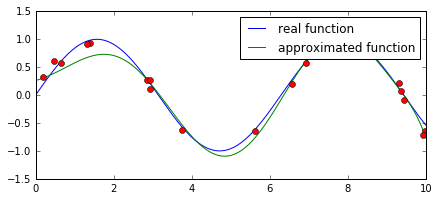

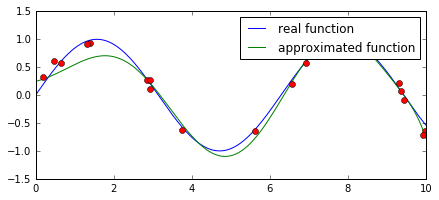

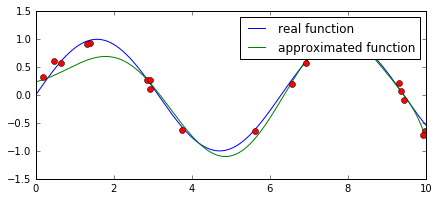

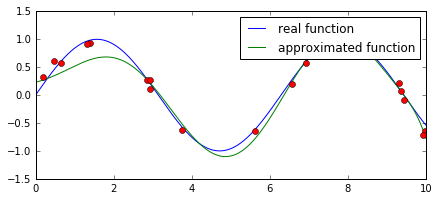

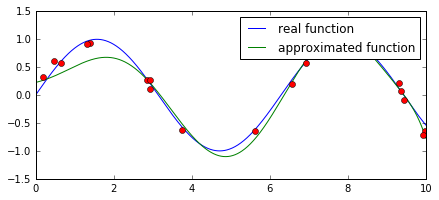

In [523]:
for i in xrange(6):
    plt = regression_plot(np.sin, lambda x: np.polynomial.polynomial.Polynomial(np.array(alpha[i]).ravel())(x), uldata, y_data)
    plt.show()

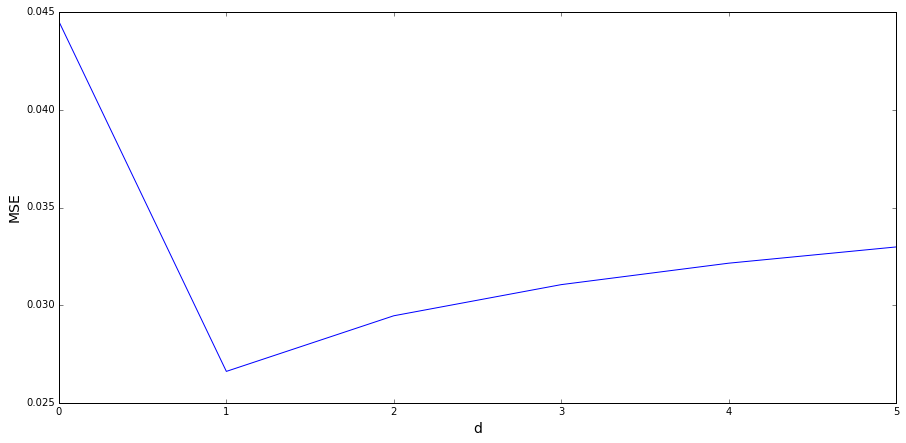

In [497]:
MSE = [((np.polynomial.polynomial.Polynomial(np.array(alpha[i]).ravel())(ultest) - y_test)**2).mean() for i in xrange(6)]
dependency_plot(range(6), MSE, 'd', 'MSE').show()

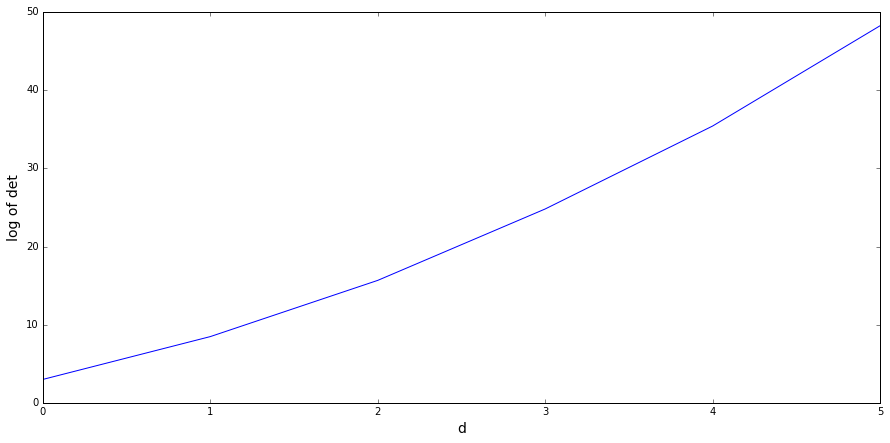

In [498]:
log_det = [np.log(abs(np.linalg.det(np.matrix(uldata_features[i]) * np.matrix(uldata_features[i]).getT()))) for i in xrange(6)]
dependency_plot(range(6), log_det, 'd', 'log of det').show()